# Genetic Heritage
*The following 7 strings were generated by taking an existing string and with a small probability either inserting a new character, deleting an existing character, or changing to a new character randomly. This created two child strings, each of these strings with around 0-20 characters changed from their parent. And from the two child strings, four grandchild strings were created, two from each child. The 4 grandchild strings also have random character changed from their parents. As result, we got 7 strings but unfortunately the order of the strings has been lost.*
<br>
(a,'CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC')<br>
(b,'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA')
(c,'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA')<br>
(d,'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA')<br>
(e,'CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA')<br>
(f,'CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC')<br>
(g,'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC')

## 1. Longest common subsequence
*Write python code to give the length of the longest common subsequence for two strings.*<br>
This implementation is recursive: the base case is two strings that can be either identical or not. If we just implement the algorithm recursively, the number of comparisons will be incredibly large very quickly. We can use dynamic programming to avoid this problem, since we will have to use the same pairs of strings multiple times.

In [1]:
import numpy as np
# defining the genetic sequences as variables
a='CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC'
b='CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA'
c='CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA'
d='CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA'
e='CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA'
f='CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC'
g='CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC'

def lcs(stra,strb):
    # make matrix (initialized to 0) that will be used to save the lengths of the subsections
    # i and j are the start and end points of the subsection as the index of the string
    m=[[0 for j in range(len(strb)+1)] for i in range(len(stra)+1)]
    for i in range(len(stra)):
        for j in range(len(strb)):
            if stra[i]==strb[j]: # if the letters are the same
                m[i+1][j+1]=m[i][j]+1 # 1 is added to the previous longest subsequence
            else:
                m[i+1][j+1]=max(m[i+1][j],m[i][j+1])
    return np.amax(m)

## 2. Table of lengths of common subsequences
*Generate the table of the lengths of the longest common subsequences for every pair of strings.*

In [2]:
lst=[a,b,c,d,e,f,g]
[[lcs(i,j) for i in lst] for j in lst]

[[100, 74, 76, 73, 82, 84, 91],
 [74, 90, 67, 72, 80, 70, 71],
 [76, 67, 97, 65, 69, 81, 84],
 [73, 72, 65, 96, 81, 71, 69],
 [82, 80, 69, 81, 96, 74, 75],
 [84, 70, 81, 71, 74, 111, 97],
 [91, 71, 84, 69, 75, 97, 104]]

## 3. Relationship between strings
*Manually examine the table, and infer the relationships between strings*
First, I want to find a node that is similar to two of the other nodes and  less similar to 4 of the other nodes. This will be the grandparent.<br>
Then I want to find 2 nodes that have 3 other nodes (parent and 2 children) that are similar and 3 other nodes that are less similar.<br>
The 4 grandchildren, finally, will be most similar only to their parent and maybe a sibling and less similar to the other nodes.<br>
Additionally, I want to consider the length of the strings as a minor factor that can help me make the decisions. If the probability of adding or taking away a letter are always the same, larger jumps are less likely.<br>
For simplicity, I first rewrite each of the columns in the table I produced with percentages, then group all the other strings into 2 or 3 categories: very similar, less similar, least similar, that describe groups of numbers, not necessarily a clear cutoff that is the same for every list, but something that makes sense for the case.<br>
<br>
**a** 
<br>length: 100<br>
{100,74,76,73,82,84,91}
<br>more similar: g
<br>less similar: f, e
<br>least similar: b, c, d<br>

**b** <br>
length:90<br>
{82,100,74,80,89,78,79}
<br>more similar: e
<br>less similar: a, d, f, g, c


<br>**c**<br>
length:97
{78,69,100,67,71,83,86}
<br> more similar: a, f, g
<br> less similar: b, c, d

<br>**d**<br>
length:96<br>
{76, 75, 68, 100, 84, 74, 72}
<br>more similar: e
<br>less similar: a, b, c, f, g

<br>**e**<br>
length:96<br>
{85, 83, 72, 84, 100, 77, 78}
<br>more similar: a, b, d
<br>less similar: c, f, g 

<br>**f**<br>
length:111<br>
{76, 63, 73, 64, 67, 100, 87}
<br>more similar: g
<br>less similar: a, c, 
<br> least similar: b, d, e

<br>**g**<br>
length:104<br>
{88, 68, 81, 66, 72, 93, 100}
<br>more similar: a, f, c
<br>less similar: b, e
<br><br>
I then used Mathematica to plot a graph where every node is connected only to the most similar nodes.


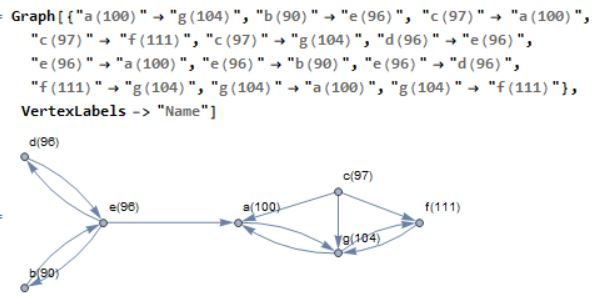

In [4]:
from IPython.display import Image
Image("graph.jpg")

The graph very nicely shows how e forms an arm with two children d and b. On the other side it is less clear, but since a has a direct connection to g and g to both a and f, I choose g as the second child of a and c as its grandchild. This is also supported by the lengths: 104 makes more sense as an intermediate step to 111.

## 4. Approach to find probabilities
*How would you estimate the probabilities of mutation, insertions and deletions? (There might not be enough data to give meaningful estimates, but at least have a clear idea of the approach.)*<br>
First, I would isolate all the parent-children relationships and collect data on how the length and match changed:<br>

| Relationship | percentage change in length | percentage similarity  to parent |
|--------------|-----------------------------|----------------------------------|
| a->e         | -4%                         | 82%                              |
| a->g         | +4%                         | 91%                              |
| e->d         | 0%                          | 84%                              |
| e->b         | -6.25%                      | 83%                              |
| g->c         | -6.7                        | 81%                              |
| g->f         | +6.7                        | 93%                              |

Let the variables representing the probabilities be m for mutation, i for insertion and d for deletion.<br>
The table can give us a few raltionships between them. First, we can see the distribution of total change. 7-19% changed for the relationships we are observing. With more sample parent-child relationships, we can come up with an accurate average change.<br>
$m+i+d=averagechange$<br>
With more data points, we can also determine the difference between i and d, since $i-d=percentage chang in length$.<br>
Once we have extracted all the information from the length of the longest common subsequence and the difference in total string length, we need to look at the strings themselves. If we have a parent string "abcdef" and a child that has abcdf as the longest common subsequence and the same length, it is important to know if the child is "abcdxf" or "abxcdf". In the first case, the letter e probably changed to x, in the second case e was removed and x was inserted between b and c. From this data, we can determine wether the operations were insertions or deletions and how often they occur.<br>
To do this on a large scale, we can use what is called the Damerau-Levenshtein distance.. Any of the calculations I suggested above assume that the resulting string is produced in the most efficient way. If the character A stays the same from one generation to the next, I assume it stayed and didn't get removed and replaced by a new A, etc. This means, if I align the strings above each other so constant letters are on top of each other, mutations are two different letters above each other, insertions are empty slots in the parent and deletion are empty slots in the child.<br>
To get from Honey, to bee, for example, one would have to edit at least 4 characters.<br>
<br>

| 1 | 2 | 3 | 4 | 5 |
|---|---|---|---|---|
| H | O | N | E | Y |
| B | _ | _ | E | E |

<br>
Doing the same kind of table for our strings can let us count the exact number of insertions (empty slots in the top string), deletions(empty slots in the bottom string) and mutations (changed slots).<br>
With a large enough sample, we can find the exact probability of each of the operations.<br>
Below, I create a dynamic programming solution for exactly this Levenshtein distance, I then test it on the example "Honey" and "bee", which returns the correct editing distance 4. I then add a column to the table above to find the Levenshtein distance between each of my parent-child pairs.

In [13]:
import numpy as np

def levenshtein(a, b):  
    size_a = len(a) + 1
    size_b = len(b) + 1
    matrix = np.zeros ((size_a, size_b))
    for x in range(size_a):
        matrix[x,0] = x 
    for y in range(size_b):
        matrix[0,y] = y 

    for x in range(1, size_a):
        for y in range(1, size_b):
            if a[x-1] == b[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_a- 1,size_b - 1])

levenshtein("honey","bee")

4.0

In [15]:
print(levenshtein(a,e))
print(levenshtein(a,g))
print(levenshtein(e,d))
print(levenshtein(e,b))
print(levenshtein(g,c))
print(levenshtein(g,f))


26.0
19.0
23.0
18.0
23.0
19.0


| Relationship | length of parent | length of child | percentage change in length | lcs | percentage similarity  to parent | levenshtein distance |
|--------------|------------------|-----------------|-----------------------------|-----|----------------------------------|----------------------|
| a->e         | 100              | 96              | -4%                         | 82  | 82%                              | 26                   |
| a->g         | 100              | 104             | +4%                         | 91  | 91%                              | 19                   |
| e->d         | 96               | 96              | 0%                          | 80  | 84%                              | 23                   |
| e->b         | 96               | 90              | -6.25%                      | 81  | 83%                              | 18                   |
| g->c         | 104              | 97              | -6.7                        | 84  | 81%                              | 23                   |
| g->f         | 104              | 111             | +6.7                        | 97  | 93%                              | 19                   |

## 5. General case
*Can you devise an algorithm in the general case which might be able to infer such a tree of relationships? Give any strengths or weaknesses of your suggested algorithm.*<br>
Again, the Damerau-Levenshtein distance can be of use (as an improved measure of similarity over the longest common subsequence). Parents should have a shorter relative editing distance to their children than any other node. Thus, we connect each node with the group of either 1 or 3 closest relatives (they must be grouped together with respect to the other editing distances). Then we plot a graph connecting those likely related nodes and find a tree structure.<br>
As we saw in part 3, this method has the weakness of random influences. Letter c, for example did not directly follow the pattern. We would also need to formulize a formal criterion for a group of editing distances to be closer related or not.

## 6. Complexity
*Describe the complexity of your solution to identify related “genes” for this assignment. (Let M be the length of a gene, and N be the number of genes.)*
The algorithm I proposed would first find the editing distance from one gene to the other, which is an operation with time complexity $O(M^2)$, using a dynamic programming solution and two strings of length M since we need to build on the optimal solution in a M by M grid. This also means we have a space complexity of M by M.<br>
We need to find this editing distance N! times to cover each possible combination of connected strings. This means the total complexity will be of order $O(NM^2)$